#**Project Title 2** : Titanic Dataset Preprocessing and Feature Engineering
  Project Goal: To prepare the Titanic dataset for subsequent machine learning model development by executing a comprehensive data preprocessing and feature engineering pipeline. This project aims to transform raw data into a clean, normalized, and enriched format suitable for various predictive modeling tasks.
  Objectives:
  1.	Missing Value Imputation:
  o	Strategically fill missing values within the dataset. For numerical features like 'Age', imputation should utilize a central tendency measure (e.g., median). For categorical features, imputation should leverage a statistical measure (e.g., mode).
  2.	Categorical Feature Encoding:
  o	Apply appropriate encoding techniques to convert categorical variables into numerical representations. This will include:
  	One-Hot Encoding: For nominal categorical features where no intrinsic order exists.
  	Label Encoding: For ordinal categorical features where a natural order is present (if applicable to the dataset, otherwise focus on one-hot for nominals).
  3.	Numerical Feature Scaling/Normalization:
  o	Standardize or normalize numerical features to a consistent scale to prevent features with larger magnitudes from disproportionately influencing model training. Implement either MinMaxScaler or StandardScaler based on the distribution characteristics of the features.
  4.	Feature Engineering:
  o	Title Extraction: Develop a robust method to extract passenger titles (e.g., Mr., Mrs., Miss, Master, Dr., Rev.) from the 'Name' column. This new 'Title' feature should be handled appropriately (e.g., mapping similar titles, handling rare titles).
  o	Family Size Creation: Construct a new feature named 'FamilySize' by combining existing 'SibSp' (siblings/spouses aboard) and 'Parch' (parents/children aboard) features, reflecting the total number of family members with each passenger.
  Tools/Libraries:
  •	Python
  •	Pandas (for data manipulation)
  •	Scikit-learn (for imputation, encoding, and scaling transformers)
  Deliverables:
  •	A well-structured and commented Python script (.py or Jupyter Notebook .ipynb) detailing all preprocessing and feature engineering steps.
  •	The preprocessed DataFrame as an output (either saved to a file or made available for subsequent analysis).
  •	Documentation (within comments or markdown cells) explaining the rationale behind chosen imputation strategies, encoding methods, scaling techniques, and the logic for new feature creation.
  Success Criteria:
  •	All specified preprocessing steps are successfully implemented without errors.
  •	The resulting dataset is free of missing values in the targeted columns.
  •	Categorical variables are appropriately encoded.
  •	Numerical features are scaled as required.
  •	The new 'Title' and 'FamilySize' features are accurately created and integrated into the dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading data set.
df = pd.read_csv("/content/Titanic-Dataset.csv")

###Exploring data

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking howmuch columns and rows.
print("There are number of (rows and columns) as" ,df.shape)

There are number of (rows and columns) as (891, 12)


In [ ]:
#This is the full information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Statistical information of numerical featurs
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Checking null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Above in Age column there are 177 missing values and in cabin 687 and in Embarked 2.

In [ ]:
# chcking numerical and categorical columns in the data set

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("numerical columns are ", numerical_cols)
print("categorical columns are ", categorical_cols)

numerical columns are  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical columns are  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


###Missing Value Imputation:
So as we know that above in Age column there are 177 missing values and in cabin 687 and in Embarked 2. As age is numerical so we will impute it with median because mean will be not suitable if there is outlire so we will use median and for cabin column we will drop it because it have too much missing values and Embarked is a categorical column so we will fill it with mode.

In [ ]:
# As requirment of task we will impute through sklearn.

from sklearn.impute import SimpleImputer

In [ ]:
# Imputing Age missing values with median
numerical_imputer = SimpleImputer(strategy='median')

df[['Age']] = numerical_imputer.fit_transform(df[['Age']])


In [ ]:
#Imputing Embarked with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[['Embarked']] = categorical_imputer.fit_transform(df[['Embarked']])


In [ ]:
#droping cabin column as there is too much null values
df.drop(columns=['Cabin'],inplace = True)

In [ ]:
#Cheking again for null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


So as we see there is no any null value for any column.

###Categorical Feature Encoding:
So move on next step we will encode the categorical columns that we need so in that data set two columns are importent and need to be incodede thats are ['Sex','Embarked'] .

In [ ]:
print("unique values in Sex feature are", df['Sex'].unique())
print("unique values in Embarked feature are", df['Embarked'].unique())

unique values in Sex feature are ['male' 'female']
unique values in Embarked feature are ['S' 'C' 'Q']


So above we can see the data what kind of that for **Embarked** we will use One hot Encoding because it nominal and for **Sex** feature we can use both but i think there is preferable One-Hot-Encoding because we can not say male>female or female>male so there cannot be order we will use one hot encoding for both

In [ ]:
#Importing from sklearn
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cols_to_encode = ['Embarked', 'Sex']


In [ ]:
#Encoding columns
encoder = OneHotEncoder(drop='first', sparse_output=False)

#it will return a numpy array
encoded_data = encoder.fit_transform(df[cols_to_encode])

In [ ]:
#getting encoded featurs names
encoded_cols = encoder.get_feature_names_out(cols_to_encode)

In [ ]:
#So make it DateFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)
encoded_df

,Embarked_Q,Embarked_S,Sex_male
0,0.0,1.0,1.0
1,0.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,1.0
...,...,...,...
886,0.0,1.0,1.0
887,0.0,1.0,0.0
888,0.0,1.0,0.0
889,0.0,0.0,1.0


In [ ]:
#Now connect that encoded df with the original data set and drop the Embarked and Sex column

In [ ]:
df = df.drop(columns= cols_to_encode)

In [ ]:
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
#So here is the data set after categorical columns "Sex" and "Embarked" encoded.
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,1.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0.0,1.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0.0,0.0,1.0


###Numerical Feature Scaling/Normalization:

We are scaling only **Age** and **Fare** because they are continuous numerical features with wide value ranges. Scaling helps ensure they don’t dominate the model due to their larger magnitudes.

**Here we will decide on these 2 columns which scalling technique we should use.**

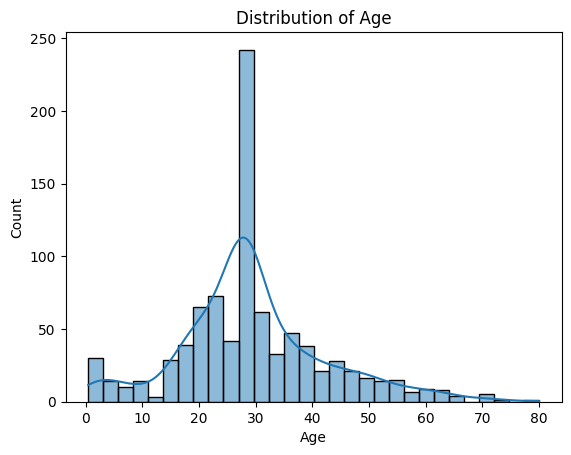

In [ ]:
#Age distribution

sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

In [ ]:
#Also checking skewness by code
df['Age'].skew()

np.float64(0.5102446555756495)

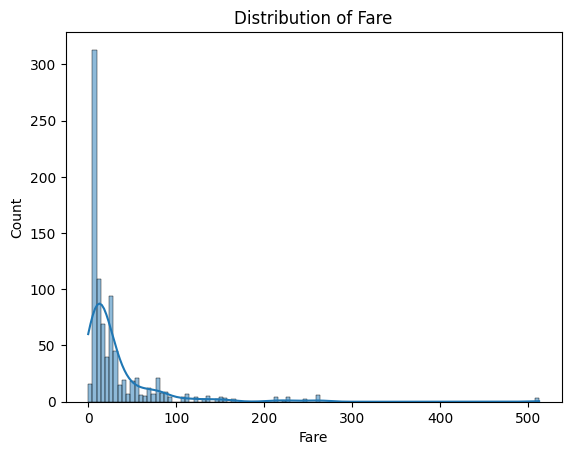

In [ ]:
#Fare distribution
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

In [ ]:
#skewness of Fare
df['Fare'].skew()

np.float64(4.787316519674893)

Age has low skewed value so i will use standerd scaler and the Fare hase right high skewed value i will use the MinMax Scaler


In [ ]:
#Importing Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [ ]:
#scaling values
df['Age'] = standard_scaler.fit_transform(df[['Age']])
df['Fare'] = minmax_scaler.fit_transform(df[['Fare']])

###Feature Engineering

Here is the first goal is to make a title column from Name column.

In [ ]:
# Extracting titles from names.
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

So above i see many titles that are extract in Title column


In [ ]:
#Grouping Similar and Rare columns


# Replace similar titles with common ones
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})

# Replace rare titles with 'Rare'
df['Title'] = df['Title'].replace([
    'Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir',
    'Col', 'Capt', 'Countess', 'Jonkheer'
], 'Rare')

Here is goal 2 that is to make a Family Size Feature by combining the SibSp & Parch.

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Sex_male,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,0.014151,0.0,1.0,1.0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.139136,0.0,0.0,0.0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,0.015469,0.0,1.0,0.0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.103644,0.0,1.0,0.0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,0.015713,0.0,1.0,1.0,Mr,1


###Columns Droping

Here i will drop the columns those not needed those are:

*  **PassengerId**: Serves only as a unique identifier with no relevance to survival prediction.

* **Name**: We've already extracted the Title feature from it, which captures the useful information.

* **SibSp** and **Parch**: These have been combined into a new feature FamilySize, which better represents family relationships.

* **Ticket**: Contains high-cardinality alphanumeric values with no clear pattern or structure.

* **Cabin**: Was removed earlier due to excessive missing values (~77%) making it unreliable for analysis.



In [ ]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)


In [ ]:
df.head()


,Survived,Pclass,Age,Fare,Embarked_Q,Embarked_S,Sex_male,Title,FamilySize
0,0,3,-0.565736,0.014151,0.0,1.0,1.0,Mr,2
1,1,1,0.663861,0.139136,0.0,0.0,0.0,Mrs,2
2,1,3,-0.258337,0.015469,0.0,1.0,0.0,Miss,1
3,1,1,0.433312,0.103644,0.0,1.0,0.0,Mrs,2
4,0,3,0.433312,0.015713,0.0,1.0,1.0,Mr,1


Above i can see there only Title that i created is remaining now to encode because it is categorical so here i will aply the One_Hot_Encoding

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
title_encoded = encoder.fit_transform(df[['Title']])
title_df = pd.DataFrame(title_encoded, columns=encoder.get_feature_names_out(['Title']), index=df.index)

df = pd.concat([df.drop('Title', axis=1), title_df], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Age,Fare,Embarked_Q,Embarked_S,Sex_male,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,-0.565736,0.014151,0.0,1.0,1.0,2,0.0,1.0,0.0,0.0
1,1,1,0.663861,0.139136,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0
2,1,3,-0.258337,0.015469,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0
3,1,1,0.433312,0.103644,0.0,1.0,0.0,2,0.0,0.0,1.0,0.0
4,0,3,0.433312,0.015713,0.0,1.0,1.0,1,0.0,1.0,0.0,0.0


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Sex_male', 'FamilySize', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare'],
      dtype='object')

In [ ]:
df.to_csv('titanic_preprocessed.csv', index=False)
